In [1]:
import importlib
import logging
import time

import numba
import numpy as np

import deduce_asymptotics
from deduce_asymptotics import deduce

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()

2024-07-19 14:53:55,934 - Collecting data for square_log...
2024-07-19 14:53:56,094 - Iteration   0. Input length: 64, Avg time: 0.01541 ± 0.04147 seconds
2024-07-19 14:53:56,122 - Iteration   1. Input length: 70, Avg time: 0.002257 ± 0.0003682 seconds
2024-07-19 14:53:56,161 - Iteration   2. Input length: 77, Avg time: 0.002873 ± 0.001215 seconds
2024-07-19 14:53:56,187 - Iteration   3. Input length: 84, Avg time: 0.002385 ± 0.0002831 seconds
2024-07-19 14:53:56,213 - Iteration   4. Input length: 92, Avg time: 0.002438 ± 0.0001715 seconds
2024-07-19 14:53:56,242 - Iteration   5. Input length: 101, Avg time: 0.002784 ± 0.0001446 seconds
2024-07-19 14:53:56,278 - Iteration   6. Input length: 111, Avg time: 0.00342 ± 0.0002329 seconds
2024-07-19 14:53:56,321 - Iteration   7. Input length: 122, Avg time: 0.004173 ± 0.0002789 seconds
2024-07-19 14:53:56,380 - Iteration   8. Input length: 134, Avg time: 0.005628 ± 0.0003516 seconds
2024-07-19 14:53:56,451 - Iteration   9. Input length: 147,

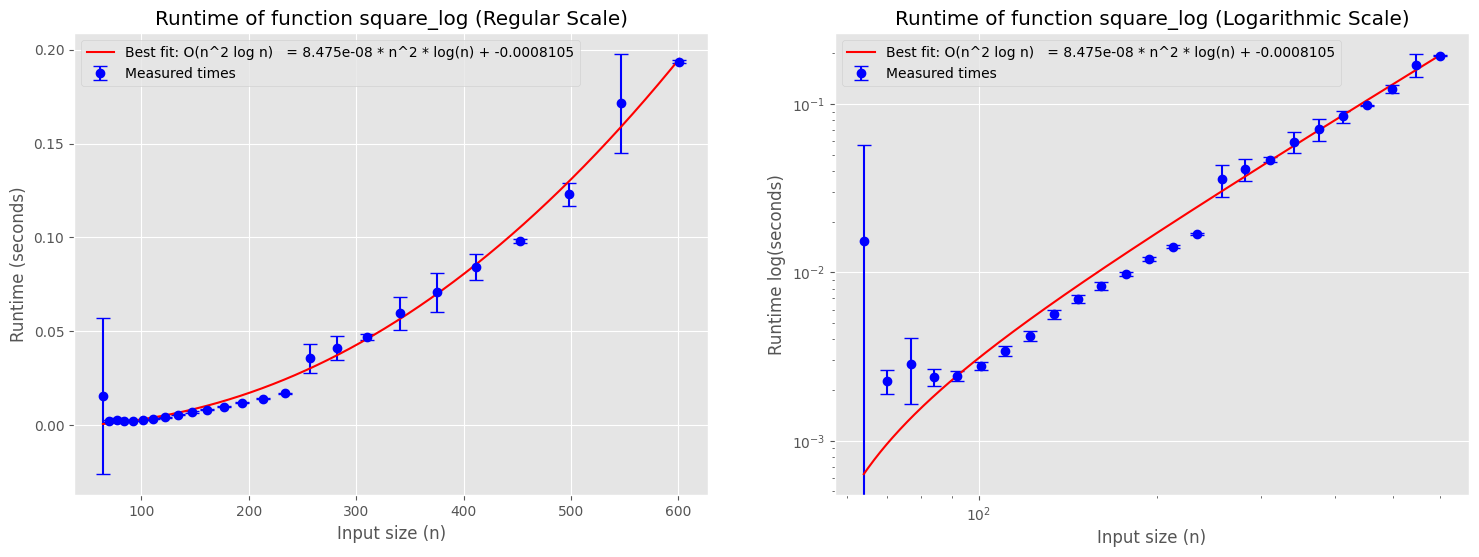

Time complexity of the function square_log is O(n^2 log n)
Time = 8.475e-08 * n^2 * log(n) + -0.0008105 (sec)


In [2]:
def square_log(input_data: list) -> None:
    for i in range(len(input_data)):
        for j in range(len(input_data)):
            k = 1
            while k < len(input_data):
                k *= 2

def random_data(n: int) -> list:
    x = np.random.randint(0, 100_000, size=n)
    return x

deduce(square_log, random_data)

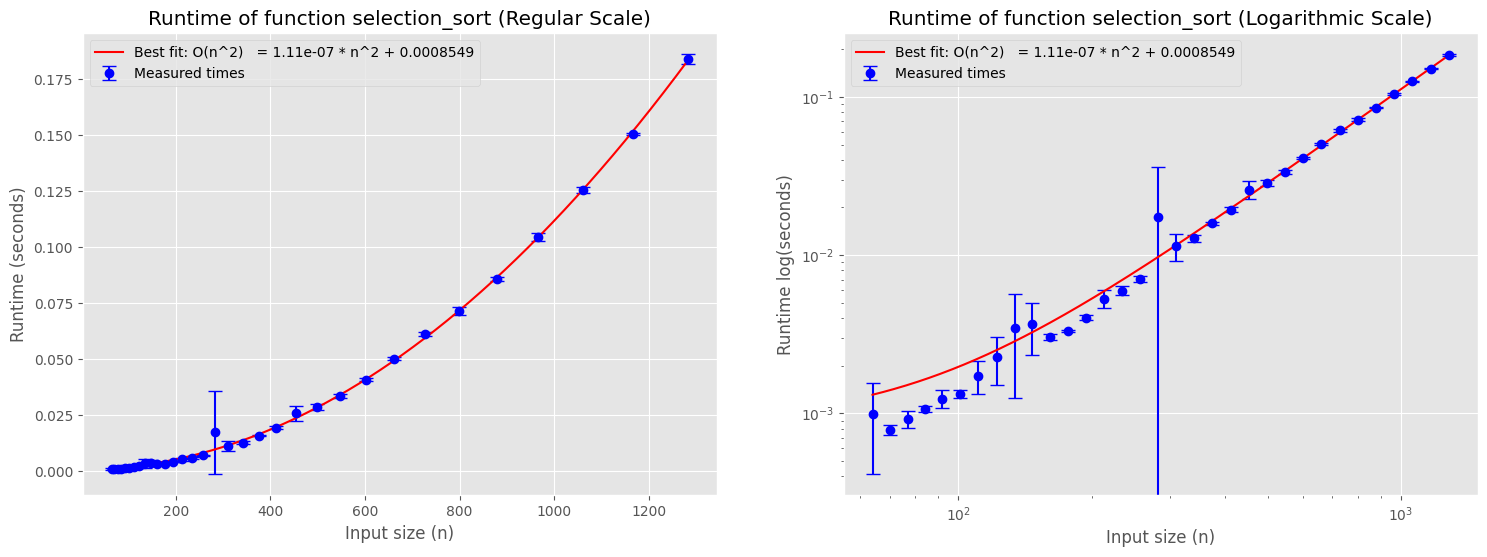

Time complexity of the function selection_sort is O(n^2)
Time = 1.11e-07 * n^2 + 0.0008549 (sec)


In [3]:
def selection_sort(input_data: list) -> None:
    for i in range(len(input_data) - 1):
        min_index = i
        for j in range(i + 1, len(input_data)):
            if input_data[j] < input_data[min_index]:
                min_index = j
        input_data[i], input_data[min_index] = input_data[min_index], input_data[i]

logger.setLevel(logging.CRITICAL)
deduce(selection_sort, random_data)

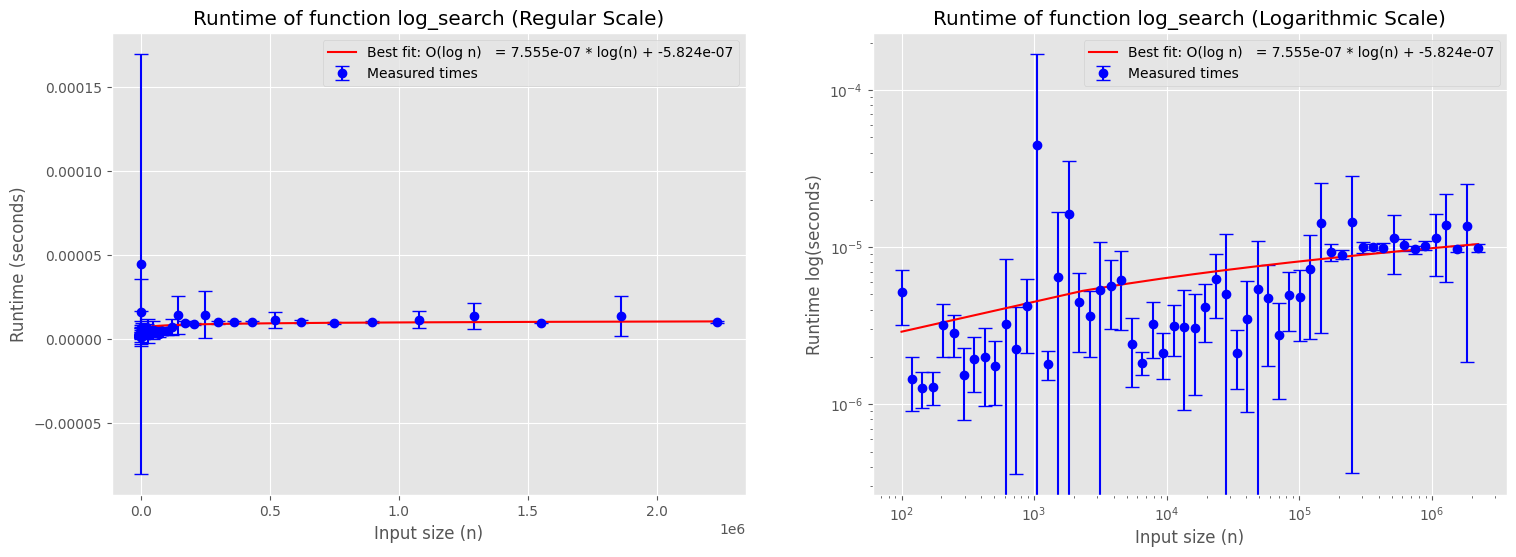

Time complexity of the function log_search is O(log n)
Time = 7.555e-07 * log(n) + -5.824e-07 (sec)


In [4]:
def log_search(input_data: list, key: int=0) -> int:
    i = len(input_data) // 2
    j = 0
    while i >= j:
        if input_data[i] == key:
            return i
        elif input_data[i] > key:
            j = i + 1
        else:
            i = i - 1
    return -1

def random_sorted_data(n: int) -> list:
    x = np.random.randint(0, 100_000, size=n)
    x = np.sort(x)
    return x

deduce(log_search, random_sorted_data, time_budget=10, num_samples=10, step=lambda n: int(n * 1.2), start=100)

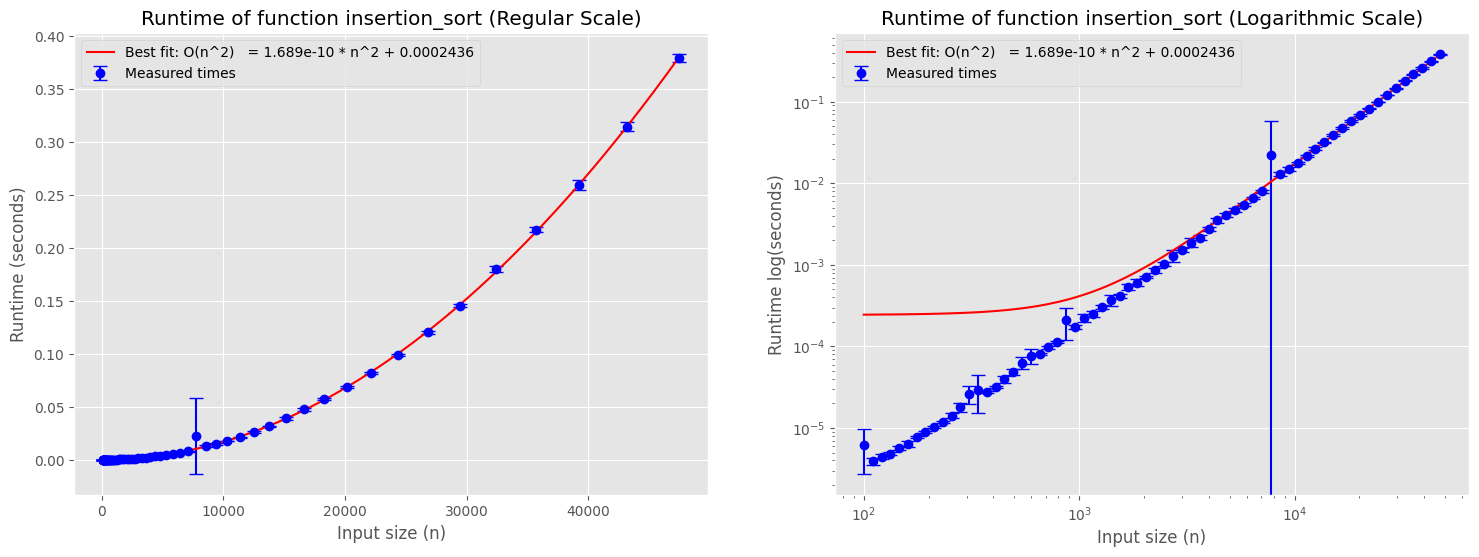

Time complexity of the function insertion_sort is O(n^2)
Time = 1.689e-10 * n^2 + 0.0002436 (sec)


In [5]:
@numba.njit
def insertion_sort(input_data: list) -> None:
    for i in range(1, len(input_data)):
        j = i
        while j > 0 and input_data[j - 1] > input_data[j]:
            input_data[j - 1], input_data[j] = input_data[j], input_data[j - 1]
            j -= 1

insertion_sort(random_data(50))  # Warm up for numba.jit
deduce(insertion_sort, random_data, time_budget=20, num_samples=10, step=lambda n: int(n * 1.1), start=100)